# ERA5 Regression

## Configuration

In [1]:
INPUT_FILE = 'csvs/database_era5_regression.csv'

In [2]:
from lib.helpers import *
from lib.plots import *
from IPython.display import set_matplotlib_formats
from IPython.core.display import clear_output

%matplotlib inline
%load_ext autoreload
%autoreload 2
set_matplotlib_formats('retina', 'png', 'pdf')

## Read data

In [3]:
import pandas as pd

df = pd.read_csv(INPUT_FILE, na_values=['#NAME?'])

In [4]:
len(df)

3763

In [5]:
df.head(5)

,timestamp,analysis,forecast
0,1.199207e+09,9.499301,9.990836
1,1.199250e+09,7.498165,7.737631
2,1.199293e+09,4.674887,4.689982
3,1.199336e+09,3.641566,2.717196
4,1.199380e+09,1.607855,3.142631


#### Split into variables

In [6]:
y = df.forecast
X = df.drop(['timestamp', 'forecast'], axis=1)

In [7]:
y.head(5)

0    9.990836
1    7.737631
2    4.689982
3    2.717196
4    3.142631
Name: forecast, dtype: float64

In [8]:
X.head(5)

,analysis
0,9.499301
1,7.498165
2,4.674887
3,3.641566
4,1.607855


### Distribution of features

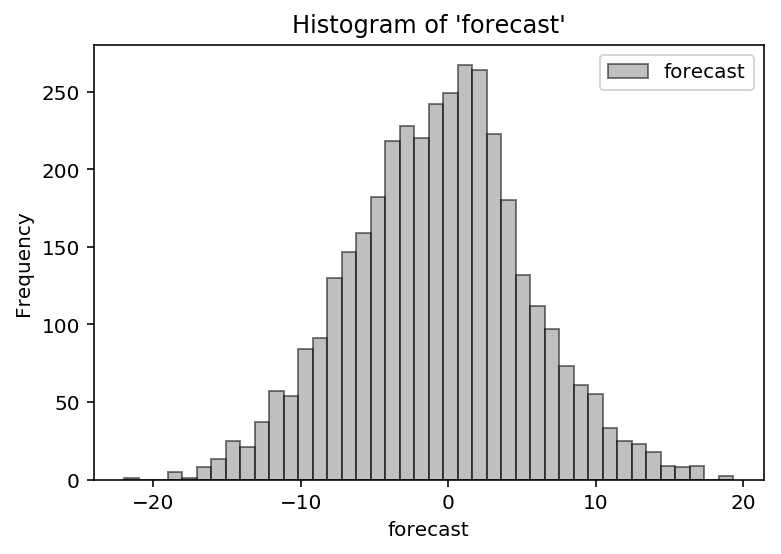

In [9]:
plot_histogram(y)

## Feature selection and model building

### Split processed data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=0)

In [11]:
print('Train: {}'.format(X_train.shape))
print('Test: {}'.format(X_test.shape))

Train: (2822, 1)
Test: (941, 1)


### Shuffle train data

In [12]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X, y, random_state=0)

### Build model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=y_test.index, name='{}_prediction'.format(y_test.name))

get_scores([
    pd.Series([y_train, model.predict(X_train)], name='Training'),
    pd.Series([y_test, y_pred], name='Testing')
])

/Users/adrian-gonzalez/PFM/env/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


,EV,R2,RMSE
Training,0.974728,0.974728,0.952146
Testing,0.976257,0.976255,0.940576


#### Histogram compare

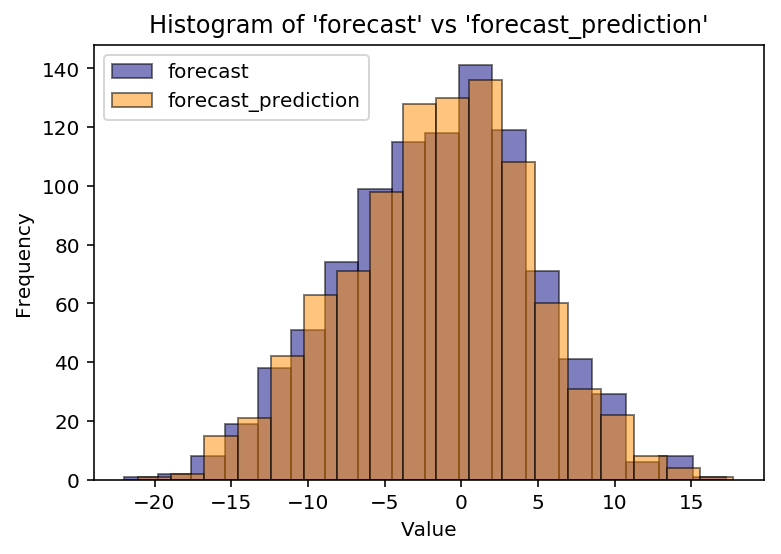

In [14]:
plot_histogram_compare(y_test, y_pred)

#### Scatter compare

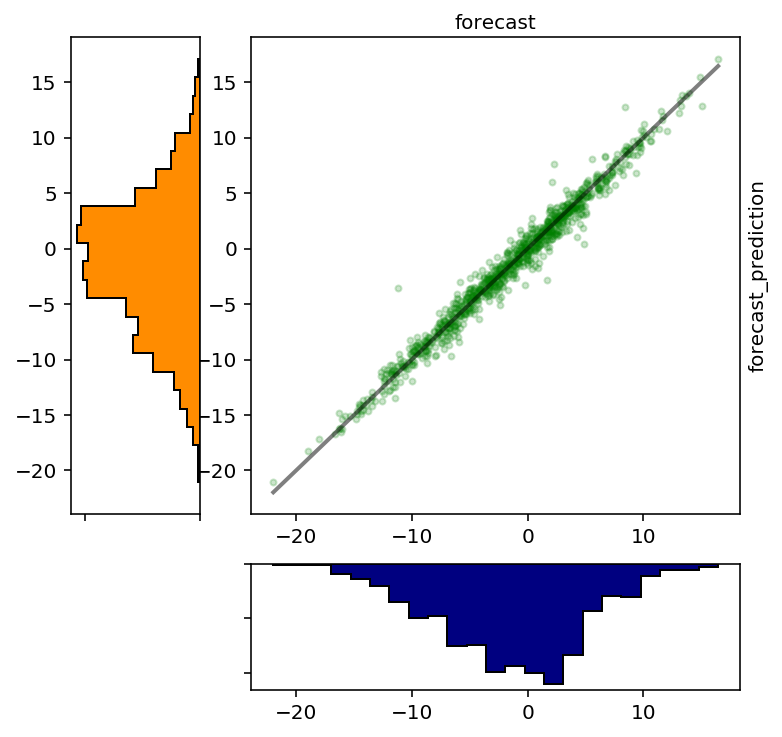

In [15]:
plot_scatter_histogram(y_test, y_pred)

#### Accuracy histogram

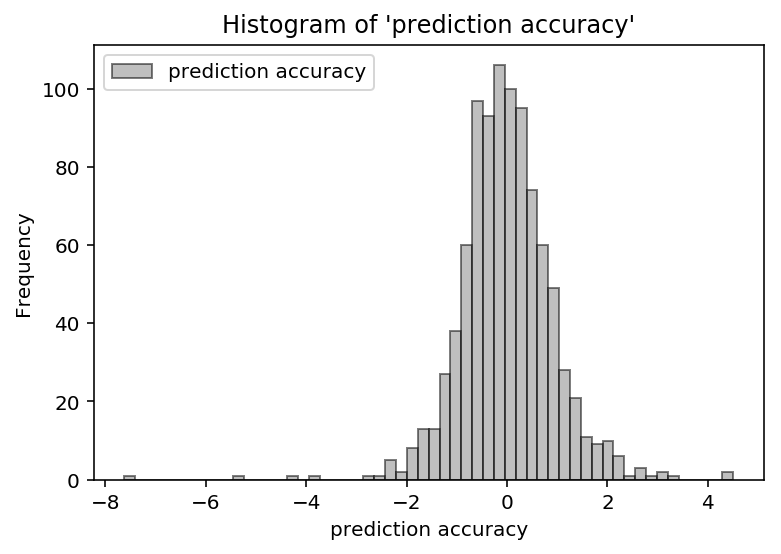

In [16]:
y_accuracy = pd.Series(y_test - y_pred, name='prediction accuracy')

plot_histogram(y_accuracy)